### 9. This problem involves the OJ data set which is part of the ISLP package.

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data

In [2]:
df = load_data('OJ')
df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [3]:
df['Store7'] = np.where(df['Store7'] == 'Yes', 1, 0)

##### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=800, random_state=1)
df_train

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
952,MM,267,2,1.86,2.18,0.0,0.4,0,1,0.003817,1.78,1.86,-0.08,0,0.183486,0.000000,0.32,2
1038,MM,235,1,1.69,1.99,0.0,0.0,0,0,0.400000,1.99,1.69,0.30,0,0.000000,0.000000,0.30,1
386,MM,229,2,1.69,1.69,0.0,0.0,0,0,0.165373,1.69,1.69,0.00,0,0.000000,0.000000,0.00,2
973,MM,243,1,1.86,1.99,0.0,0.8,0,1,0.314957,1.19,1.86,-0.67,0,0.402010,0.000000,0.13,1
238,CH,250,7,1.86,2.09,0.0,0.0,0,0,0.820592,2.09,1.86,0.23,1,0.000000,0.000000,0.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,MM,275,2,1.96,2.18,0.0,0.8,0,1,0.168709,1.38,1.96,-0.58,0,0.366972,0.000000,0.22,2
715,MM,267,3,1.99,2.09,0.1,0.0,0,0,0.000130,2.09,1.89,0.20,0,0.000000,0.050251,0.10,3
905,MM,231,7,1.69,1.99,0.0,0.0,0,0,0.256000,1.99,1.69,0.30,1,0.000000,0.000000,0.30,0
235,CH,236,3,1.79,2.09,0.0,0.0,0,0,0.649594,2.09,1.79,0.30,0,0.000000,0.000000,0.30,3


##### (b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train, x_test = df_train.drop('Purchase', axis=1), df_test.drop('Purchase', axis=1) 
y_train, y_test = df_train['Purchase'], df_test['Purchase']
model = DecisionTreeClassifier(random_state=1).fit(x_train, y_train)
accuracy_score(y_test, model.predict(x_test))

0.7555555555555555

##### (c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

[Text(0.46219841930116473, 0.9705882352941176, 'LoyalCH <= 0.454\ngini = 0.471\nsamples = 800\nvalue = [496, 304]'), Text(0.19051580698835274, 0.9117647058823529, 'LoyalCH <= 0.276\ngini = 0.356\nsamples = 289\nvalue = [67, 222]'), Text(0.06738768718801996, 0.8529411764705882, 'LoyalCH <= 0.051\ngini = 0.201\nsamples = 168\nvalue = [19, 149]'), Text(0.026622296173044926, 0.7941176470588235, 'StoreID <= 2.5\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'), Text(0.019966722129783693, 0.7352941176470589, 'LoyalCH <= 0.003\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'), Text(0.013311148086522463, 0.6764705882352942, 'WeekofPurchase <= 269.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'), Text(0.0066555740432612314, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.019966722129783693, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.026622296173044926, 0.6764705882352942, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'), Text(0.033277870216306155, 0.73529411

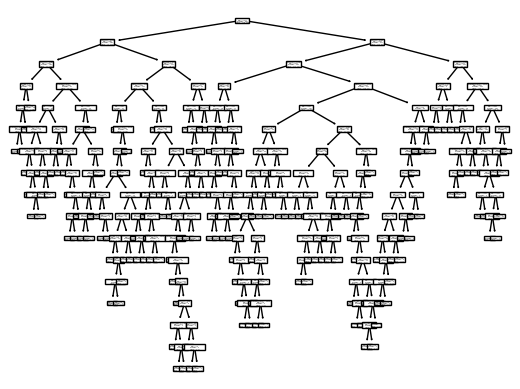

In [6]:
from sklearn.tree import plot_tree
print(plot_tree(model, feature_names=x_train.columns))
print(model.get_n_leaves())

##### (d) Use the export_tree() function to produce a text summary of the ftted tree. Pick one of the terminal nodes, and interpret the information displayed.

In [7]:
from sklearn.tree import export_text
print(export_text(model, feature_names=x_train.columns))

|--- LoyalCH <= 0.45
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.05
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- class: MM
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: MM
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.05
|   |   |   |--- WeekofPurchase <= 249.50
|   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |--- WeekofPurchase <= 235.50
|   |   |   |   |   |   |--- WeekofPurchase <= 232.00
|   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |--- WeekofPurchase >  232.00
|   |   |   |   |   |   |   |--- SpecialCH <= 0.50
|   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |   |--- SpecialCH >  0.50
|   |   |   |   |   |   |   |   |--- WeekofPurchase <= 233.50
|   |   |   |   |   |  

##### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, y_pred=model.predict(x_test))

array([[132,  25],
       [ 41,  72]])

##### (f) Use cross-validation on the training set in order to determine the optimal tree size.

##### (g) Produce a plot with tree size on the x-axis and cross-validated classifcation error rate on the y-axis.

In [9]:
model.get_depth()

16

Text(0, 0.5, 'Error rate')

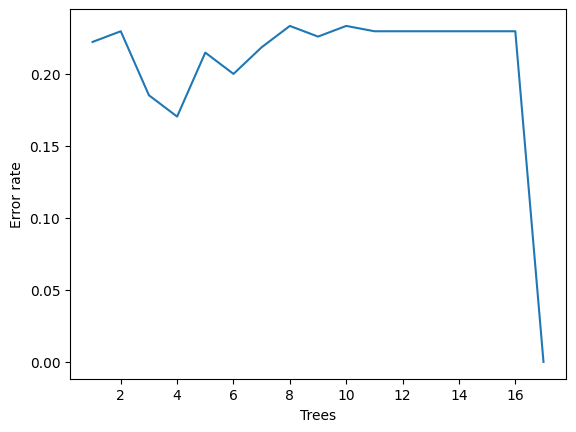

In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
error = np.zeros(17)
for i in range(1,17):
    model = DecisionTreeClassifier(max_depth=i, random_state=1).fit(x_train, y_train)
    error[i-1] = 1 - np.average(cross_val_score(model, x_test, y_test, scoring='accuracy', cv=5))
plt.plot(range(1,18), error)
plt.xlabel('Trees')
plt.ylabel('Error rate')

##### (h) Which tree size corresponds to the lowest cross-validated classifcation error rate?

- max depth 17

##### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [11]:
pruned = DecisionTreeClassifier(max_leaf_nodes=5, random_state=1).fit(x_train, y_train)

##### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

##### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [12]:
unpruned = DecisionTreeClassifier(random_state=1).fit(x_train, y_train)
print(accuracy_score(y_train, unpruned.predict(x_train)))
print(accuracy_score(y_train, pruned.predict(x_train)))

0.99
0.835


The unpruned tree has a much better training error rate. 

In [13]:
unpruned = DecisionTreeClassifier(random_state=1).fit(x_train, y_train)
print(accuracy_score(y_test, unpruned.predict(x_test)))
print(accuracy_score(y_test, pruned.predict(x_test)))

0.7555555555555555
0.8185185185185185


The pruned tree has a slightly better test error rate. 